# Data Smoothing

As usual, this code set up access to the project code:

In [8]:
import os
import sys
projdir = os.path.abspath('../..')
if not projdir in sys.path:
    sys.path.insert(0,projdir)

In [9]:
import mmtime

It is a fact of life that when you digitize data using your mouse, you will not produce the smooth curve you might be trying to capture. I discovered that trying to digitize small images with *WebPlotDigitizer* caused the expanded view of the curve used to locate points more precisely to jump from pixel to pixel and I was not able to home in on the spot I was after. Blowing the images up to full screen helped, but the curves were still jittery. Time to try some data smoothing.

Let's work on some airfoil coefficient curves we will need later and see if we can fix some of this.

First some setup to access the data:

In [10]:
from mmtime.utils import get_points, fit_curve

In [11]:
datadir = os.path.join(projdir,'mmtime','data','airfoils','arc3')

We first consider the digitized lift coefficient data:

In [12]:
clfile = os.path.join(datadir,'CL-re3k.csv')
cl_x, cl_y = get_points(clfile)
fit_cl = fit_curve(cl_x, cl_y)

Here is the filtering operation

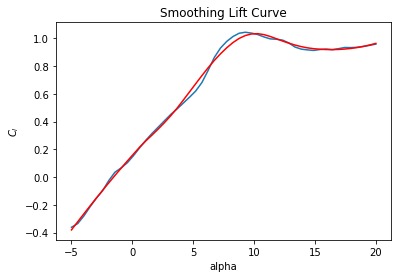

In [13]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

x = np.linspace(-5,20,50)
raw_cl = fit_cl(x)
smooth_cl = savgol_filter(raw_cl, 21, 3)

plt.plot(x, raw_cl)
plt.plot(x,smooth_cl, color='red')
plt.title('Smoothing Lift Curve')
plt.xlabel('alpha')
plt.ylabel('$C_l$')

plt.show()

This plot shows the original data and the smoothed result. It is up to you to decide is this new data better reflects the original source!

Let's look at the drag coefficient curve:

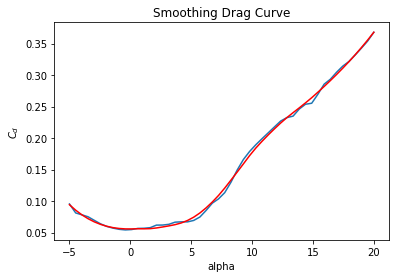

In [14]:
cdfile = os.path.join(datadir,'CD-re3k.csv')
cd_x, cd_y = get_points(cdfile)
fit_cd = fit_curve(cd_x, cd_y)
raw_cd = fit_cd(x)
smooth_cd = savgol_filter(raw_cd, 21, 3)

plt.plot(x, raw_cd)
plt.plot(x,smooth_cd, color='red')
plt.title('Smoothing Drag Curve')
plt.xlabel('alpha')
plt.ylabel('$C_d$')
plt.show()

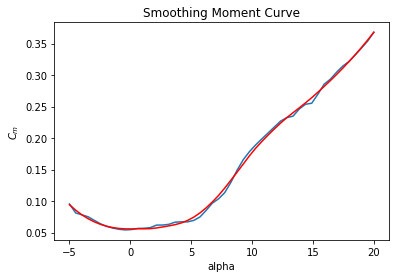

In [15]:
cmfile = os.path.join(datadir, 'CM-re3k.csv')
cm_x, cm_y = get_points(cdfile)
fit_cm = fit_curve(cm_x, cm_y)
raw_cm = fit_cm(x)
smooth_cm = savgol_filter(raw_cm, 21, 3)

plt.plot(x, raw_cm)
plt.plot(x,smooth_cm, color='red')
plt.title('Smoothing Moment Curve')
plt.xlabel('alpha')
plt.ylabel('$C_m$')
plt.show()

These results look much better. In this study, the smoothed data looks more like the original graphs, so I am going to use these new curves. Note that the smoothing operation did not smooth the function we generated, it smoothed the data produced by the that function. If you want a smoothed function, you need to refit the smoothed data points. Good thing computers are fast!

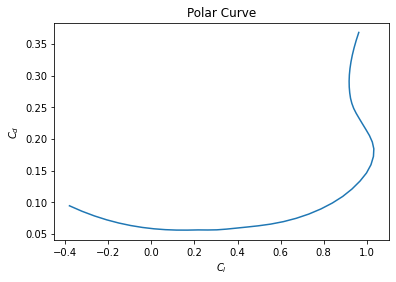

In [18]:
plt.plot(smooth_cl, smooth_cd)
plt.title('Polar Curve')
plt.xlabel('$C_l$')
plt.ylabel('$C_d$')
plt.show()

Before we leave this section, lets create a more useful plotting function. This one will be a Python "class" that lets us start a plot, then add curves it so we can see more than one at a time. Classes are part of Python's object-oriented programming scheme where you build objects out of class templates. each object has a set of "methods" that perform various actions on the objects you create. This is very handy when building complex programs.

In [13]:
import matplotlib.pyplot as plt

class Plotter:
    
    def __init__(self):
        pass
        
    def set_x_axis(self, xpts):
        self.x_points = xpts
        
    def show(self):
        plt.show()
        
    def add_curve(self, y_points, label, style=None):
        if style is None:
            plt.plot(self.x_points, y_points, 
                label=label)
        else: 
            plt.plot(self.x_points, y_points,
                label = label, linestyle=style)
        
    def set_title(self, title):
        plt.title(title)
        
    def set_xlabel(self,label):
        plt.xlabel(label)
        
    def set_ylabel(self, label):
        plt.ylabel(label)
    
    def set_legend(self, loc):
        plt.legend(loc=loc)

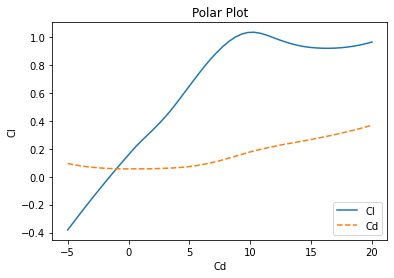

In [14]:
p = Plotter()
p.set_x_axis(x)
p.set_title("Polar Plot")
p.set_xlabel("Cd")
p.set_ylabel("Cl")
p.add_curve(smooth_cl, "Cl")
p.add_curve(smooth_cd, "Cd", "--")
p.set_legend("lower right")
p.show()

This is a more versatile plotting scheme, so I will move it into the **mmtime** **utils** code.  I added the capability of showing a line using dashes, since this article will be published in black and white.

In closing, I decided to add the filtering code to the **fit_curve** routine as an option I added an optional additional parameter that will invoke the smoothing.

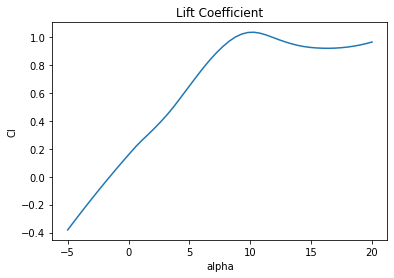

In [15]:
fit_cl = fit_curve(x,raw_cl,smooth=True)
show_curve(x, smooth_cl,"Lift Coefficient","alpha","Cl")

Again, it is up to the researcher to decide if this is a better representation of the raw data.